# OpenCV Utilities

Kevin Walchko, created 10 Dec 2016

--------


In [43]:
%matplotlib inline

In [44]:
from __future__ import print_function
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import cv2
import opencvutils as cvu

## Usage

Ok, so let's determine the OpenCV version and read in some images then display them (remember, OpenCV does BGR while Matplotlib does RGB so there is a conversion that is happening).

In [21]:
print('Using OpenCV version: \n\tmajor: {} \n\tminor: {} \n\tpatch: {}'.format(*cvu.get_opencv_version()))
print('Is this OpenCV 2? {}'.format(cvu.is_cv2()))
print('Is this OpenCV 3? {}'.format(cvu.is_cv3()))

Using OpenCV version: 
	major: 3 
	minor: 1 
	patch: 0-dev
Is this OpenCV 2? False
Is this OpenCV 3? True


## Plotting

OpenCV stores images as BGR, however, matplotlib stores them in RGB. Without some correction, the images look wrong. You can use `opencv2matplotlib()` to convert the images and display them correctly in Matplotlib.

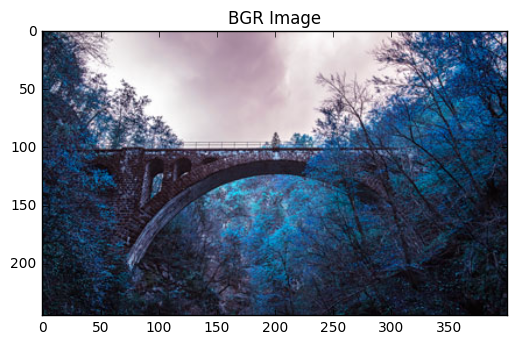

In [41]:
bridge = cv2.imread('images/bridge.jpg')
plt.imshow(bridge)
plt.title('BGR Image');

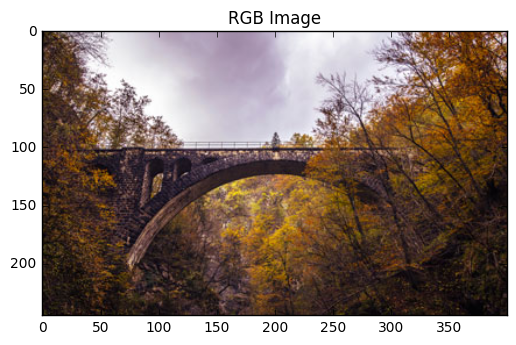

In [42]:
plt.imshow(cvu.opencv2matplotlib(bridge))
plt.title('RGB Image');

Reading in a bunch of images and plot them using `subplot()`. This can be chaned by using the `width` parameter of `imshow()`, it defines how many images across the subplot will be. You can also pass in titles for each image, just make sure the image array and title array are the same length.

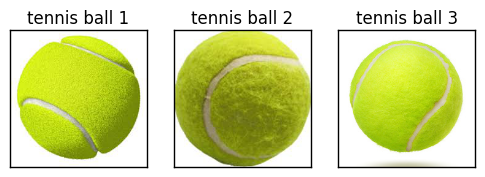

In [27]:
fnames = ['images/tennis_1.jpg','images/tennis_2.jpg','images/tennis_3.jpg']
imgs = []
for f in fnames:
    imgs.append(cv2.imread(f))
cvu.imshow(imgs, width=3, titles=['tennis ball 1','tennis ball 2','tennis ball 3'])

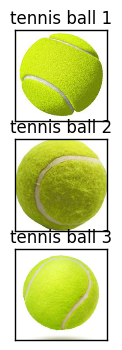

In [28]:
cvu.imshow(imgs, width=1, titles=['tennis ball 1','tennis ball 2','tennis ball 3'])

## Useful Functions

In [29]:
cvu.find_function('contour')

1. contourArea
2. drawContours
3. findContours
4. isContourConvex


In [30]:
from opencvutils import paths
for imagePath in paths.list_images("./images"):
    print(imagePath)

./images/bridge.jpg
./images/cactus.jpg
./images/notecard.png
./images/pyimagesearch_logo.jpg
./images/shapes.png
./images/tennis_1.jpg
./images/tennis_2.jpg
./images/tennis_3.jpg
./images/workspace.jpg


## Basic Image Operations

`opencvutils` allows simple operations like: translate, rotate, resize, skeletonize, labelling, and edge detection.

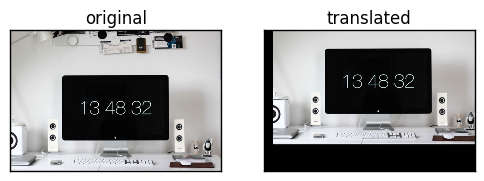

In [31]:
bridge = cv2.imread('images/workspace.jpg')
translated = cvu.translate(bridge, 25, -75)
cvu.imshow([bridge, translated], titles=['original', 'translated'])

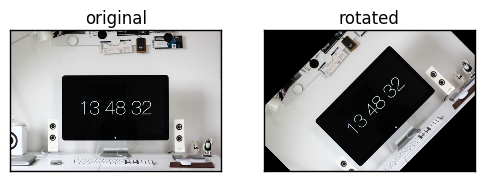

In [32]:
rotated = cvu.rotate(bridge, 45)
cvu.imshow([bridge, rotated], titles=['original', 'rotated'])

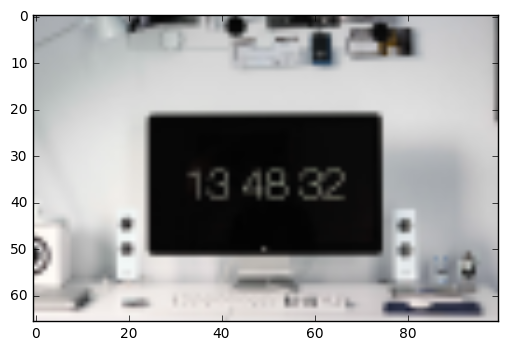

In [33]:
# set the image width to 100 px
scaled = cvu.resize(bridge, width=100)
plt.imshow(scaled);

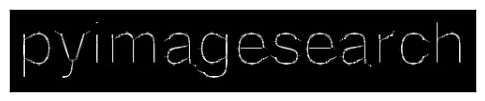

In [39]:
logo = cv2.imread("images/pyimagesearch_logo.jpg")
gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
skeleton = cvu.skeletonize(gray, size=(3, 3))
cvu.imshow([skeleton])

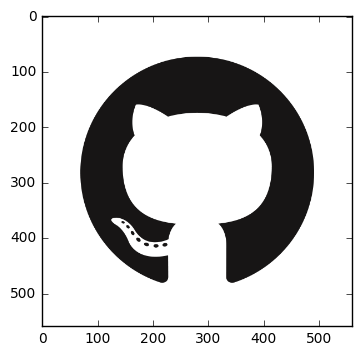

In [35]:
url = 'https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png'
logo = cvu.url_to_image(url)
plt.imshow(cvu.opencv2matplotlib(logo));

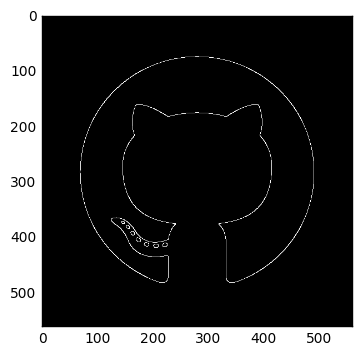

In [36]:
gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
edgeMap = cvu.auto_canny(gray)
plt.imshow(edgeMap, cmap='gray');

## More Advanced Operations

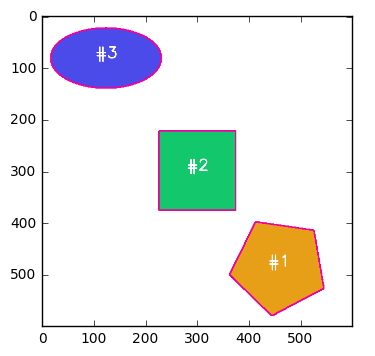

In [37]:
from opencvutils import contours
# import cvu.contours as contours

# load the shapes image clone it, convert it to grayscale, and
# detect edges in the image
image = cv2.imread("images/shapes.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cvu.auto_canny(gray)

# find contours in the edge map using OpenCV 2.4.X
if cvu.is_cv2():
    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

# find contours in the edge map using OpenCV 3
elif cvu.is_cv3():
    (_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

# loop over the (unsorted) contours and label them
for (i, c) in enumerate(cnts):
    orig = contours.label_contour(orig, c, i, color=(240, 0, 159))

# show the original image
plt.imshow(orig);

In [38]:
# loop over the sorting methods
pics = []
meth = ("left-to-right", "right-to-left", "top-to-bottom", "bottom-to-top")
for method in meth:
    # sort the contours
    (cnts, boundingBoxes) = contours.sort_contours(cnts, method=method)
    clone = image.copy()

    # loop over the sorted contours and label them
    for (i, c) in enumerate(cnts):
        sortedImage = contours.label_contour(clone, c, i, color=(240, 0, 159))
    pics.append(sortedImage)

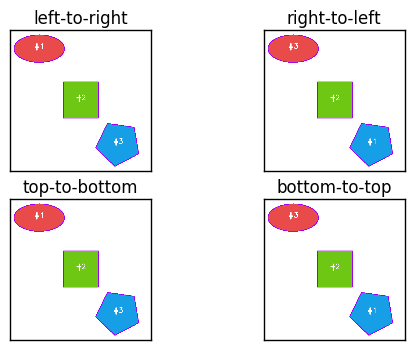

In [17]:
cvu.imshow(pics, width=2, titles=meth);

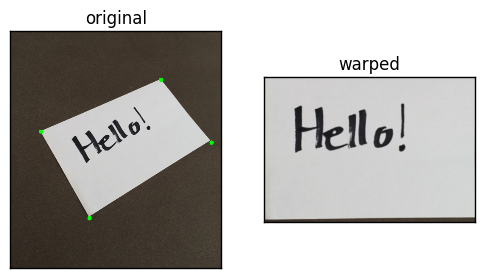

In [47]:
from opencvutils import perspective

# load the notecard code image, clone it, and initialize the 4 points
# that correspond to the 4 corners of the notecard
notecard = cv2.imread("images/notecard.png")
clone = notecard.copy()
pts = np.array([(73, 239), (356, 117), (475, 265), (187, 443)])

# loop over the points and draw them on the cloned image
for (x, y) in pts:
    cv2.circle(clone, (x, y), 5, (0, 255, 0), -1)

# apply the four point tranform to obtain a "birds eye view" of
# the notecard
warped = perspective.four_point_transform(notecard, pts)

cvu.imshow([clone, warped], titles=['original', 'warped'])

## Camera

blah ...

## Calibration

blah ...

-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.